          Total number of missing values  Percentage of missing values
age                                    0                           0.0
sex                                    0                           0.0
cp                                     0                           0.0
trtbps                                 0                           0.0
chol                                   0                           0.0
fbs                                    0                           0.0
restecg                                0                           0.0
thalachh                               0                           0.0
exng                                   0                           0.0
oldpeak                                0                           0.0
slp                                    0                           0.0
caa                                    0                           0.0
thall                                  0                           0.0
output

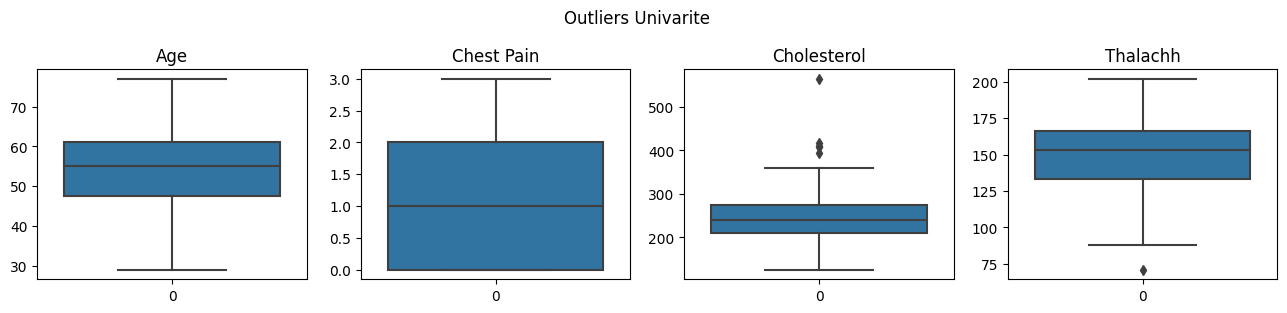

[Text(0.5378787878787878, 0.9375, 'x[2] <= 0.5\nentropy = 0.99\nsamples = 181\nvalue = [80, 101]'),
 Text(0.3560606060606061, 0.8125, 'x[8] <= 0.5\nentropy = 0.82\nsamples = 86\nvalue = [64, 22]'),
 Text(0.22727272727272727, 0.6875, 'x[11] <= 0.5\nentropy = 0.998\nsamples = 40\nvalue = [19, 21]'),
 Text(0.12121212121212122, 0.5625, 'x[12] <= 2.5\nentropy = 0.667\nsamples = 23\nvalue = [4, 19]'),
 Text(0.06060606060606061, 0.4375, 'x[7] <= 96.5\nentropy = 0.31\nsamples = 18\nvalue = [1, 17]'),
 Text(0.030303030303030304, 0.3125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.09090909090909091, 0.3125, 'entropy = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(0.18181818181818182, 0.4375, 'x[6] <= 0.5\nentropy = 0.971\nsamples = 5\nvalue = [3, 2]'),
 Text(0.15151515151515152, 0.3125, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.21212121212121213, 0.3125, 'x[7] <= 150.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.18181818181818182, 0.1875, 'entropy = 0.0\nsample

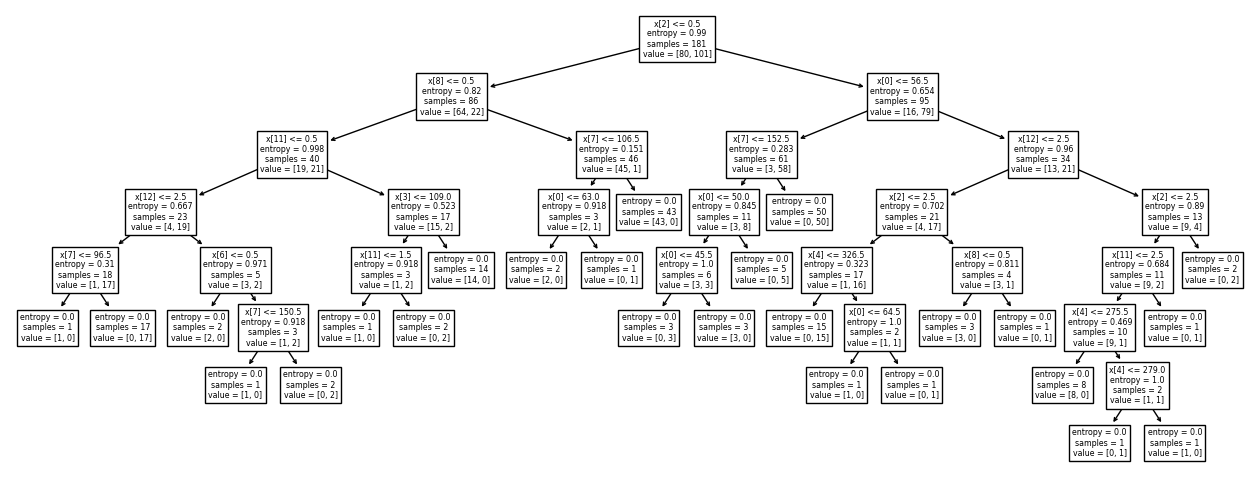

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.model_selection import DecisionTree
from sklearn.model_selection import train_test_split

#Import data by using pandas
data = pd.read_csv("heart2.csv")

# Check if there is any null values or percantage of null values
x = data.isnull().sum()
y = (data.isnull().sum()/data.shape[0])*100
z = {'Total number of missing values':x,'Percentage of missing values':y}
df = pd.DataFrame(z,columns=['Total number of missing values','Percentage of missing values'])
df.sort_values(by='Percentage of missing values', ascending=True)
print(df)

#check if there is any outliers in dataset
plt.rcParams['figure.figsize']= (16,6)

plt.subplot(2,4,1)
sns.boxplot(data['age'])
plt.title('Age')

plt.subplot(2,4,2)
sns.boxplot(data['cp'])
plt.title('Chest Pain')

plt.subplot(2,4,3)
sns.boxplot(data['chol'])
plt.title('Cholesterol')

plt.subplot(2,4,4)
sns.boxplot(data['thalachh'])
plt.title('Thalachh')

plt.suptitle("Outliers Univarite")
plt.show()


# divide the dataset for training and testing
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=1)

# creat decision tree model
from sklearn import tree

model = tree.DecisionTreeClassifier(criterion='entropy')
model = model.fit(x_train,y_train)

tree.plot_tree(model)





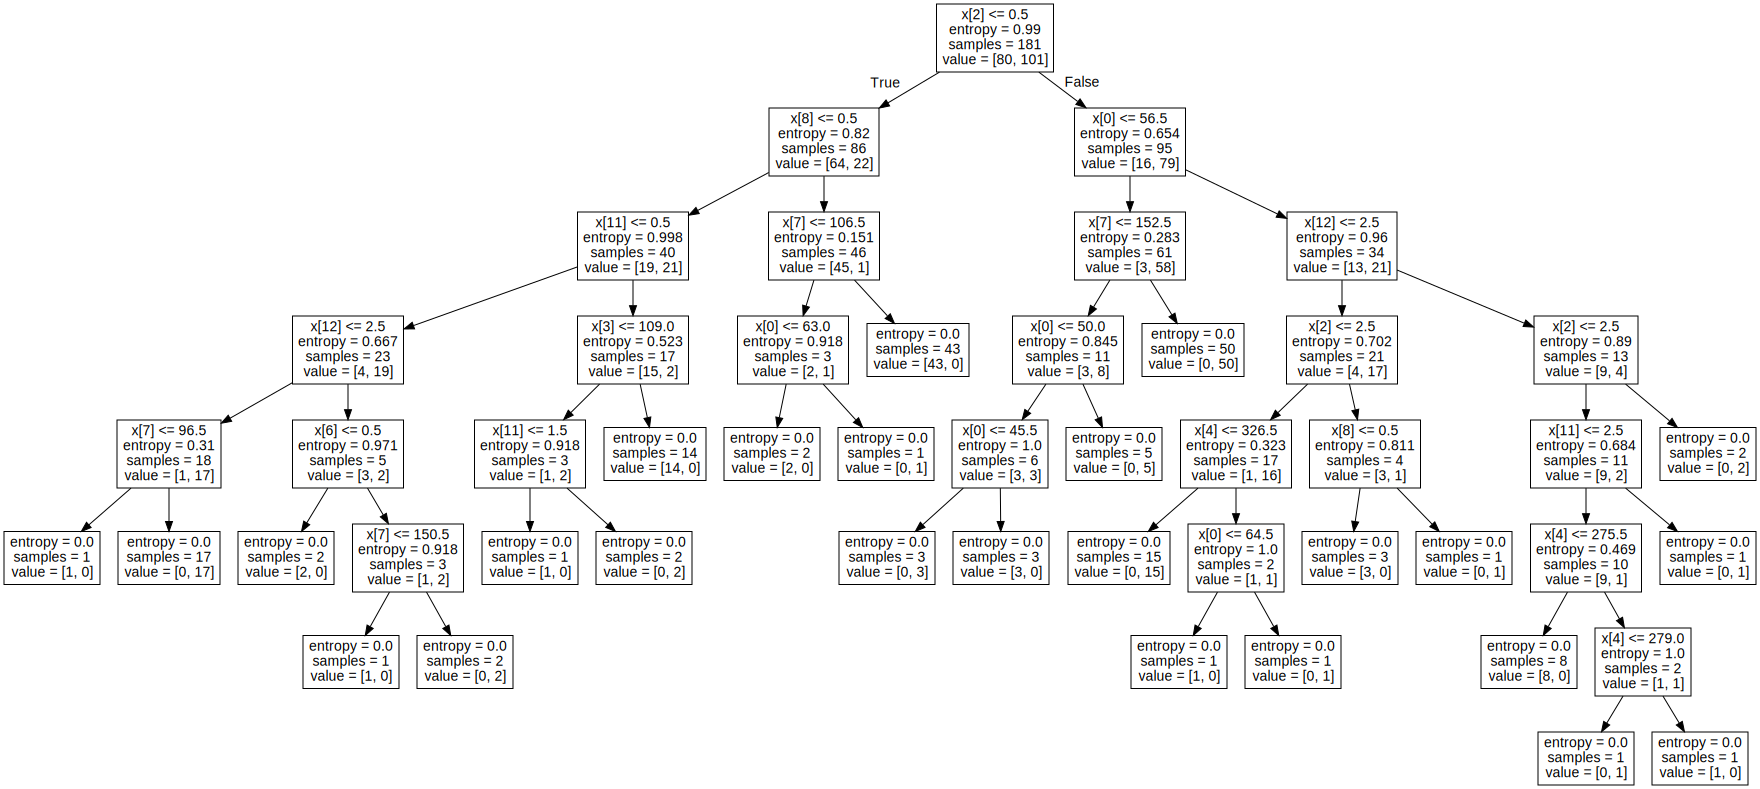

In [4]:
#for better view and clear graph we use graphviz
import graphviz
clear_view = tree.export_graphviz(model, out_file=None)

graph = graphviz.Source(clear_view)
graph


In [14]:
x_pred = model.predict(x)
print(x_pred)

[0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0
 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1]


In [12]:
x_pred == y

0      False
1       True
2       True
3       True
4      False
       ...  
298     True
299    False
300     True
301     True
302    False
Name: output, Length: 303, dtype: bool

In [13]:
print(x_pred)

[0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0
 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1]
